In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ML_utils import load_data,load_data_test_set, total_day_eve_night_grouping
df =pd.read_csv('train.csv')

### UNCOMMENT THIS PART TO GROUP FEATURES
feature_engineering = True
df=total_day_eve_night_grouping(df,grouping=feature_engineering)
exclude_list = [feature_name for feature_name in df.columns if feature_name not in['number_vmail_messages','number_customer_service_calls','total_charges','churn']]
one_hot_on = True
normalize_on = True
oversample_on=False


###################
#### LOAD DATA ####

X_train,y_train,X_val,y_val,X_test,y_test,columns = load_data(df,exclude=exclude_list,one_hot=one_hot_on,normalize_=normalize_on,oversample=oversample_on)

df=pd.DataFrame(X_train,columns=columns[:-1])

# X_train = np.concatenate((X_train, X_train[:,0].reshape(-1,1)), axis=1)
# X_train[:,-1]=X_train[:,-1]**2
# columns.insert(-1,'total_charges^2')

In [119]:
k=[10,12,15]
def euclid_distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def nearest_neighbour(X_train,y_train,x,k=1):
    distances =[]
    for index in range(X_train.shape[0]):
        distances.append({'distance':euclid_distance(x,X_train[index]),'label':y_train[index],'index':index})
        #

    distances = sorted(distances, key=lambda d: d['distance'])
    result=0
    for i in range(k):
        result+=distances[i]['label']
       
    result = result/k
    return np.round(result)


def knn(X_train,y_train,X_val,k=1):
    y_pred = []
    for x in X_val:
        y_pred.append(nearest_neighbour(X_train,y_train,x,k))
    y_pred=np.array(y_pred)
    return y_pred



In [120]:
y_pred=knn(X_train,y_train,X_val,k=10)


In [121]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(classification_report(y_val,y_pred))

print(accuracy_score(y_val,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96       539
         1.0       0.95      0.62      0.75        98

    accuracy                           0.94       637
   macro avg       0.94      0.81      0.86       637
weighted avg       0.94      0.94      0.93       637

0.9372056514913658


In [122]:
### USE THE MODEL ON THE TEST SET
df_test=pd.read_csv('test.csv')

df_test=total_day_eve_night_grouping(df_test,grouping=feature_engineering)


X_test_output=load_data_test_set(df_test,exclude=exclude_list+['id'],one_hot=one_hot_on,normalize_=normalize_on)

y_pred_output=knn(X_train,y_train,X_test_output,k=100)

y_pred_output=np.where(y_pred_output>0.5,'yes', 'no')
y_pred_output=y_pred_output.reshape(-1,)
id_column = np.arange(1, y_pred_output.shape[0] + 1)


# Create a DataFrame
df_output = pd.DataFrame({
    'id': id_column,
    'churn': y_pred_output
})


# Save the DataFrame as a CSV file
df_output.to_csv('output_knn.csv', index=False)

(2975, 3)


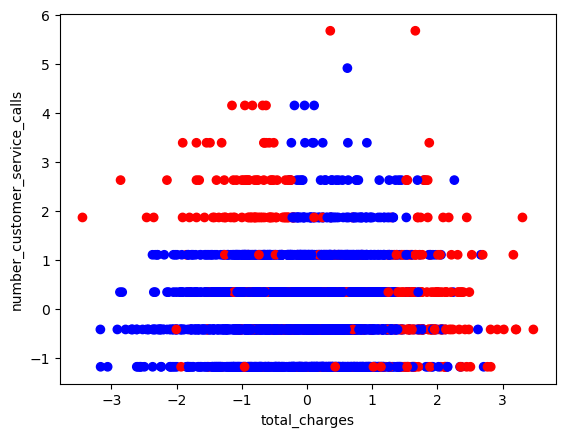

In [123]:
import matplotlib.pyplot as plt
fig = plt.figure()

# Assign color based on y_train value

colors = ['blue' if y == 0 else 'red' for y in y_train]

print(X_train.shape)

x_axis=0
y_axis=-1

plt.scatter(X_train[:, 2], X_train[:, 1], c=colors)

plt.xlabel(columns[2])
plt.ylabel(columns[1])

plt.show()


